In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn import preprocessing
from mlxtend.plotting import plot_decision_regions

In [344]:
#importing the csv file or dataset
crops = pd.read_csv(r'C:\Users\Chiitrak Sarkar\Desktop\crop.csv',engine='python')
crop_feature_name = ['rainfall','fav_temp'] 
x_crops = crops[crop_feature_name]       #naming the parameters
y_crops = crops['crop_label']            #naming the 5 labels
crop_name = ['rice','maize','wheat','millet','rabi']
crops_plot = crops
#crops.head()    #un-comment to print first 5 rows of dataset

,crop_label,crop_name,rainfall,fav_temp
0,1,rice,1750,25
1,1,rice,2000,27
2,1,rice,1800,29
3,1,rice,2450,31
4,1,rice,2900,34


In [345]:
#train-test splitting of available data
# 75:25 train:test division
x_crops2d = crops[crop_feature_name]
y_crops2d = crops['crop_label']
X_train, X_test, y_train, y_test = train_test_split(x_crops2d, y_crops2d, random_state=1)

#rescaling features
#Creating a minimum and maximum processor object
scaler = MinMaxScaler()
x_plot = scaler.fit_transform(x_crops2d)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
df_normalized = pd.DataFrame(x_plot)

df_normalized.columns = ["rainfall","fav_temp"]
df_normalized1= df_normalized*4

In [346]:
#knn model
knn = KNeighborsClassifier(n_neighbors = 3)  
knn.fit(X_train_scaled, y_train)            #fitting done

#Accuracy calculation
#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train_scaled, y_train)))
#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.92


In [347]:
#MAIN FEATURE OF THE MODEL : PREDICTING THE TYPE OF CROP BY TAKING REAL TIME INPUT THROUGH SENSORS
example_crop = [[750,25]]
example_crop_scaled = scaler.transform(example_crop)
#Making an prediction based on the 2 parameters 
print('Predicted crop type for ', example_crop, ' is ', 
          crop_name[knn.predict(example_crop_scaled)[0]-1])

Predicted crop type for  [[750, 25]]  is  maize


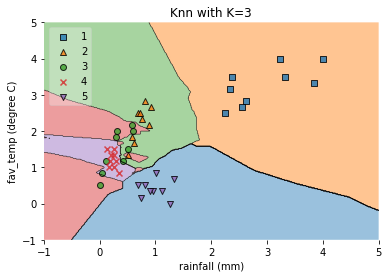

In [348]:
#plotting data
x = df_normalized1[['rainfall','fav_temp']].values
y = crops_plot['crop_label'].astype(int).values
clf = neighbors.KNeighborsClassifier(n_neighbors=3)
clf.fit(x, y)
# Plotting decision region
plot_decision_regions(x, y, clf=clf, legend=2)
# Adding axes annotations
plt.xlabel('rainfall (mm)')
plt.ylabel('fav_temp (degree C)')
plt.title('Knn with K='+ str(3))
plt.show()